In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

from project_hatebert_models import (LogisticHateBERT, RandomForestHateBERT, LassoHateBERT, HateSpeechXGBClassifier, 
                            KNNHateSpeechClassifier, RidgeHateBERT, NBHateBERTClassifier)

In [3]:
train_df = pd.read_csv("../data/train_data.csv")
test_df = pd.read_csv("../data/test_data.csv", sep=";")

X_train = train_df["text"]
y_train = train_df["label"]
X_test = test_df["comment"]
y_test = (test_df["isHate"] >= 0.25).astype(int)

In [4]:
models = [
    ("Lasso", LassoHateBERT()),
    ("Logistic", LogisticHateBERT()),
    ("Ridge", RidgeHateBERT()),
    ("KNN", KNNHateSpeechClassifier()),
    ("XGBoost", HateSpeechXGBClassifier()),
    ("Random Forest", RandomForestHateBERT()),
    ("Gaussian Naive Bayes", NBHateBERTClassifier())
]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


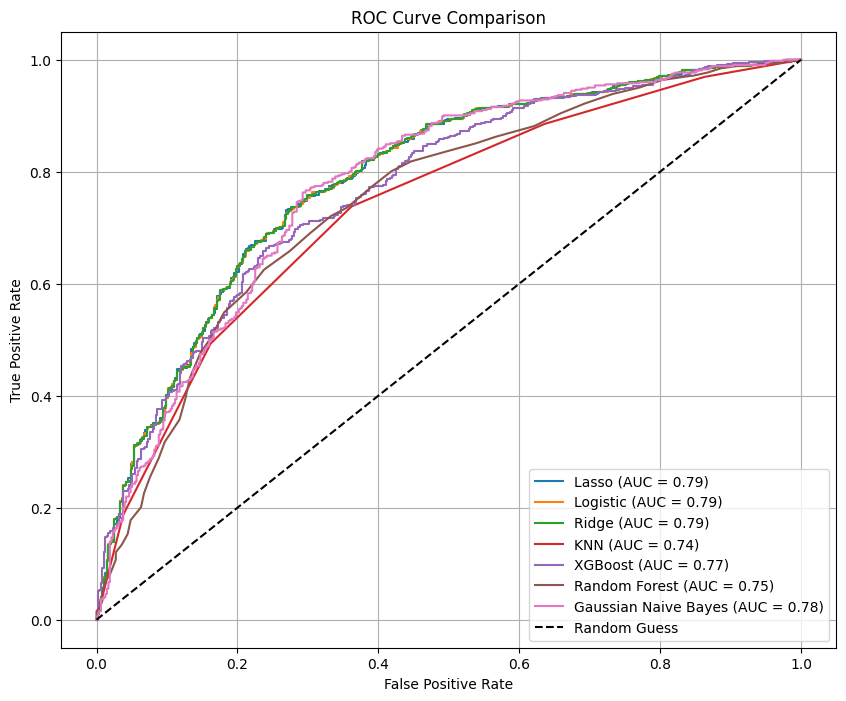

In [5]:
plt.figure(figsize=(10, 8))

for name, model in models:
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)

    if isinstance(proba, pd.Series):
        proba = proba.values
    elif proba.ndim > 1:
        proba = proba[:, 1]

    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()